# **GrabCut Algorithm**

**GrabCut Algorithm:** A method used to separate the foreground from the background in images by marking a rectangular area.

**Foreground Object Extraction:** Easily extracts or "cuts out" the main object in an image or video.

**Rectangle Selection:** Users draw a rectangle around the object to specify the foreground area, and areas outside it are initially treated as background.

**Background Removal:** Pixels outside the marked rectangle are considered extra and are removed from the final output.

**Gaussian Mixture Model (GMM):** Used by GrabCut to statistically model and distinguish the foreground and background regions based on color distributions.

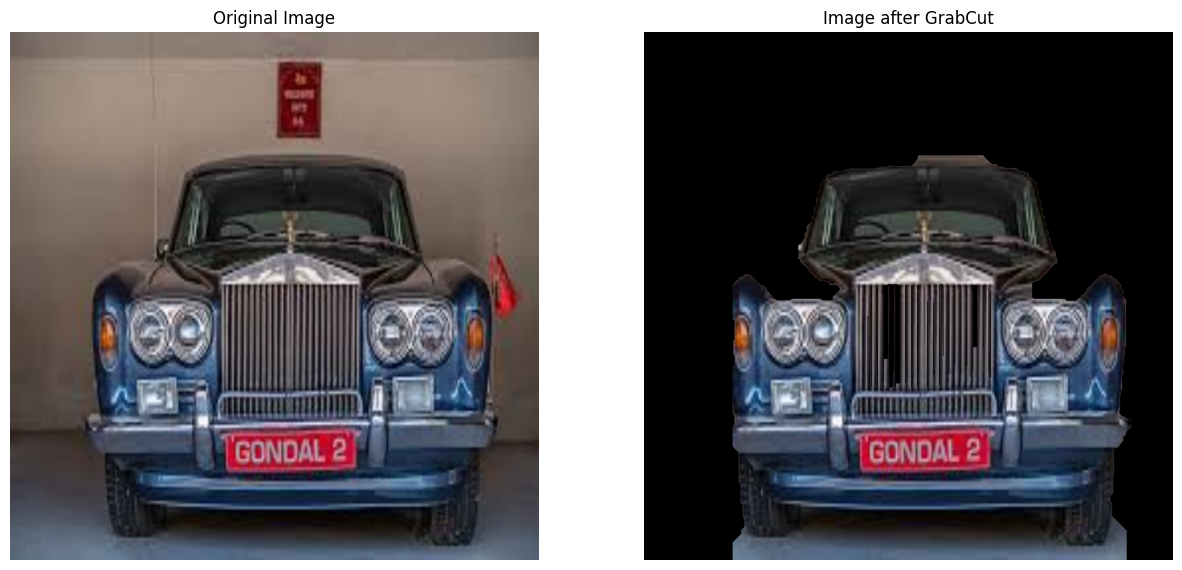

In [21]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read the image
img = cv2.imread("/content/car4.jpeg")

# Step 2: Resize the image (optional)
original_img = cv2.resize(img, (800, 800))  # Save the original image for display
img = original_img.copy()  # Make a copy for processing

# Step 3: Apply GrabCut algorithm
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)  # Background model
fgdModel = np.zeros((1, 65), np.float64)  # Foreground model

# Define the rectangle for GrabCut
rect = (134, 150, 660, 730)

# Apply GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the image
img = img * mask2[:, :, np.newaxis]

# Convert images to RGB for displaying with matplotlib
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
processed_img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original and processed images side by side
plt.figure(figsize=(15, 8))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')

# Show the segmented image
plt.subplot(1, 2, 2)
plt.imshow(processed_img_rgb)
plt.title("Image after GrabCut")
plt.axis('off')

plt.show()

#Feature Detection and Description.

**For understanding  this we recall jisaw puzzle game where we combine multiple small pieces in correct order by identifying its corners , shape and pattern.**

On the basis of all these we all detect corners in images with so many approaches.

# **The Harris Corner Detection method in OpenCV is useful for detecting corners within an image.**

**img:** Input grayscale image in float32 format, which enhances intensity-based corner detection.

**blockSize:** Defines the neighborhood size around each pixel for analyzing potential corners.

**ksize:** Determines the Sobel kernel size for gradient calculation, affecting corner sensitivity.

**k:** Free parameter (usually 0.04–0.06) controlling the algorithm's strictness in detecting corners.

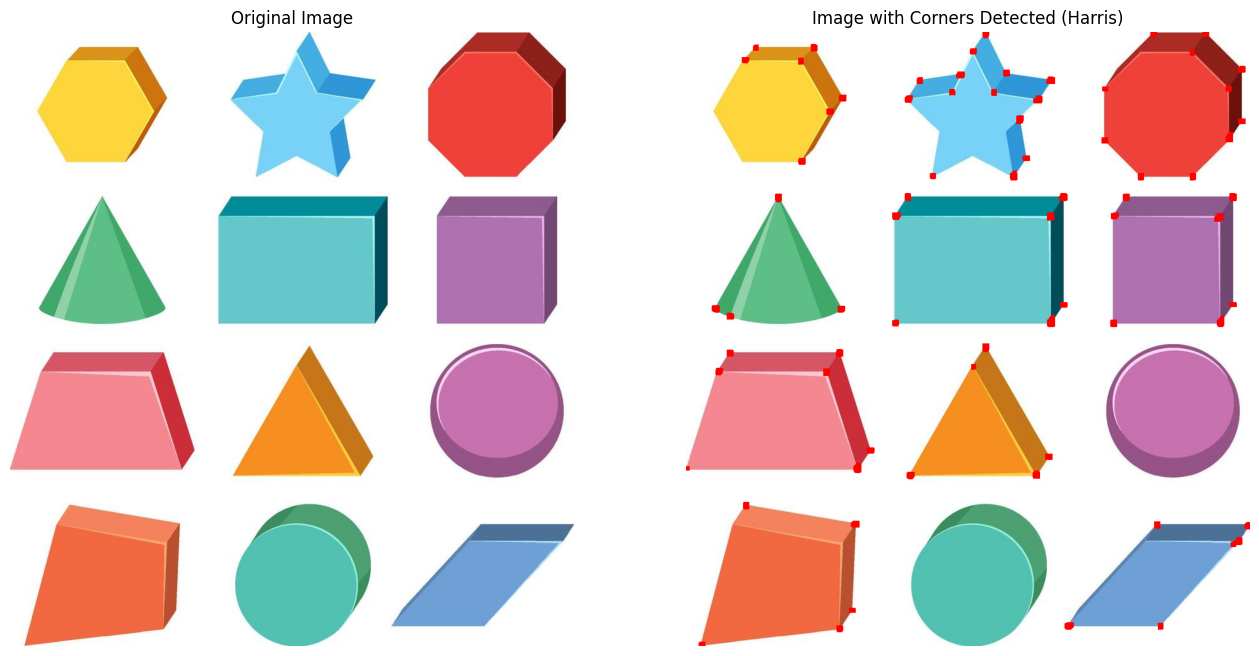

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Define the image path
image_path = '/content/sha.jpg'  # Replace with your image path

# Read the image
img = cv.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or the path is incorrect.")
else:
    # Make a copy of the original image for displaying later
    img_rgb_orig = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Convert to float32 as required by the Harris corner detector
    gray = np.float32(gray)

    # Apply Harris corner detector with modified parameters
    res = cv.cornerHarris(gray, blockSize=6, ksize=3, k=0.04)

    # Increase the thickness of the corners by using a larger dilation kernel
    kernel = np.ones((7, 7), np.uint8)  # Larger kernel for more thickness
    res = cv.dilate(res, kernel)

    # Mark corners in red on the original image
    img_with_corners = img.copy()  # Copy original image to mark corners
    img_with_corners[res > 0.01 * res.max()] = [0, 0, 255]

    # Convert images to RGB for displaying with matplotlib
    img_rgb_corners = cv.cvtColor(img_with_corners, cv.COLOR_BGR2RGB)

    # Display the original and the image with corners side-by-side
    plt.figure(figsize=(16, 8))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb_orig)
    plt.title("Original Image")
    plt.axis("off")

    # Show the image with detected corners
    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb_corners)
    plt.title("Image with Corners Detected (Harris)")
    plt.axis("off")

    plt.show()


# **Shi-Tomasi Corner Detector**

**Shi-Tomasi Corner Detector:** An improvement over Harris, focusing on detecting strong corners with adjustable quality.

**Effectiveness:** More accurate for detecting distinct corners, especially in simple shapes.

**Quality Control**: Allows filtering of weaker corners by setting a quality threshold.

**User-Friendly:** Offers maxCorners and qualityLevel parameters for easy customization.

**Function cv2.goodFeaturesToTrack():** OpenCV function implementing Shi-Tomasi; flexible and easy to use.

<ipython-input-34-e79bfd468102>:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


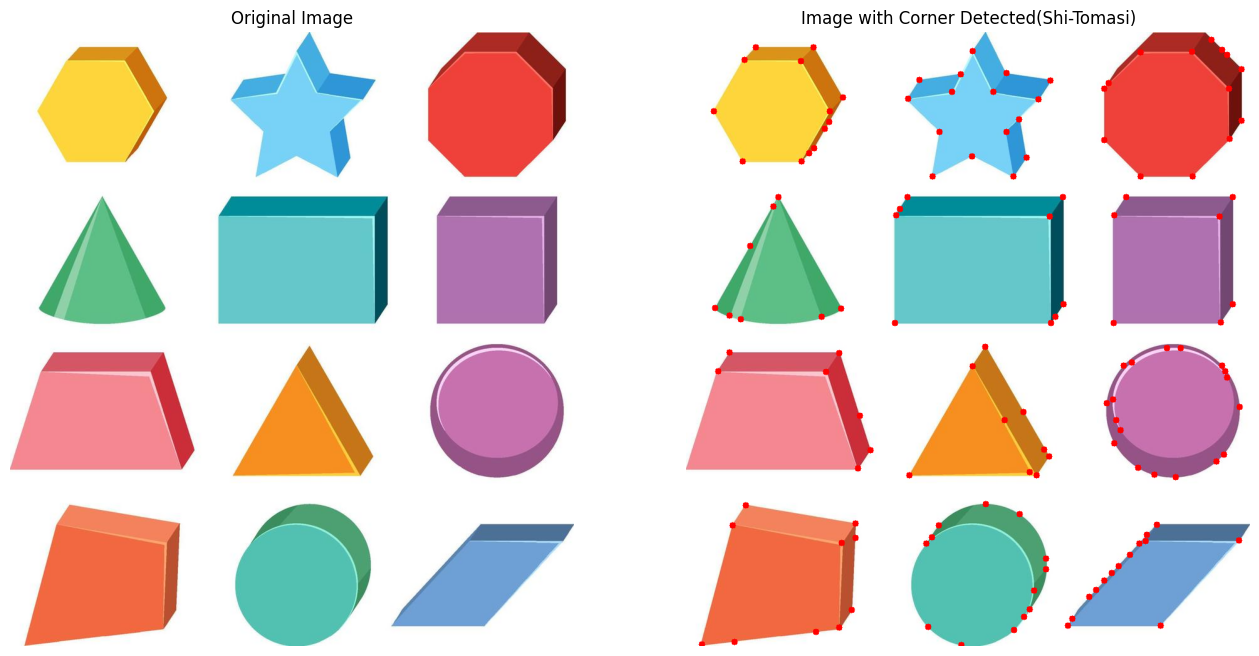

In [34]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image
img = cv.imread("/content/sha.jpg")

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or the path is incorrect.")
else:
    # Display the original image
    img_rgb_orig = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Use Shi-Tomasi corner detection to detect more corners
    corners = cv.goodFeaturesToTrack(gray, maxCorners=200, qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)

    # Mark detected corners in red
    img_with_corners = img.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv.circle(img_with_corners, (x, y), 5, (0, 0, 255), -1)  # Red color for corners

    # Convert images to RGB for displaying with matplotlib
    img_rgb_corners = cv.cvtColor(img_with_corners, cv.COLOR_BGR2RGB)

    # Display the original and the image with corners side-by-side
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb_orig)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_rgb_corners)
    plt.title("Image with Corner Detected(Shi-Tomasi)")
    plt.axis("off")
    plt.show()

